In [3]:
import pandas as pd
from pandasql import sqldf
sql_query = lambda q: sqldf(q, globals())

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 광고데이터 분석 > ad_data.csv
df= pd.read_csv('/Users/Jooah_kim/Downloads/ad_data.csv')

In [5]:
df.head()

,광고_채널,광고_형식,광고_노출_횟수,광고_클릭_횟수,광고_지출액,광고_타겟팅,광고_시작일,광고_종료일,사용자_ID,성별,...,거주_지역,직업,관심사,구매_이력,웹사이트_방문_수,페이지뷰,전환율,매출액,광고_회상률,광고_태도_변화
0,SNS,텍스트,9849,294,757.26,"20대, 남성, 패션",2024-08-15,2024-09-01,b0551863-4726-4d83-abf4-0aeba5663b3c,남성,...,안양,직장인,요리,3,301,1204,0.007,126.99,0.212,-0.128
1,온라인,텍스트,9904,505,378.65,"50대, 여성, 게임",2024-12-11,2024-12-30,7ef04a52-9152-489c-8073-5c86cc397e39,남성,...,대전,프리랜서,패션,3,509,1527,0.022,2030.33,0.187,-0.234
2,온라인,배너,10048,545,564.96,"40대, 여성, 패션",2024-07-31,2024-08-27,0dca36e9-1a44-4455-8930-da5d7ab7f870,여성,...,천안,프리랜서,기술,4,547,547,0.020,963.91,0.249,-0.040
3,SNS,배너,9988,326,570.79,"40대, 남성, 건강",2024-11-05,2024-11-21,ff995b59-0554-4db2-9f7f-b1e4a50002d4,여성,...,춘천,공무원,여행,5,331,1324,0.027,1727.08,0.153,-0.180
4,SNS,이미지,10113,277,772.68,"50대, 남성, 게임",2024-03-03,2024-03-17,6de271b7-ddc0-4c82-9951-693753f99210,여성,...,진주,직장인,패션,1,287,1148,0.017,663.02,0.154,0.197


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   광고_채널      100000 non-null  object 
 1   광고_형식      100000 non-null  object 
 2   광고_노출_횟수   100000 non-null  int64  
 3   광고_클릭_횟수   100000 non-null  int64  
 4   광고_지출액     100000 non-null  float64
 5   광고_타겟팅     100000 non-null  object 
 6   광고_시작일     100000 non-null  object 
 7   광고_종료일     100000 non-null  object 
 8   사용자_ID     100000 non-null  object 
 9   성별         100000 non-null  object 
 10  연령         100000 non-null  int64  
 11  거주_지역      100000 non-null  object 
 12  직업         100000 non-null  object 
 13  관심사        100000 non-null  object 
 14  구매_이력      100000 non-null  int64  
 15  웹사이트_방문_수  100000 non-null  int64  
 16  페이지뷰       100000 non-null  int64  
 17  전환율        100000 non-null  float64
 18  매출액        100000 non-null  float64
 19  광고_회상률     100000 non-nu

In [7]:
# 날짜 타입 변환
df["광고_시작일"] = pd.to_datetime(df["광고_시작일"])
df["광고_종료일"] = pd.to_datetime(df["광고_종료일"])

In [8]:
# 광고 효과 지표 추가
df["CTR"] = df["광고_클릭_횟수"] / df["광고_노출_횟수"]  # 클릭률 (Click Through Rate)
df["ROAS"] = df["매출액"] / df["광고_지출액"]  # ROAS (Return on Ad Spend)
df["CPA"] = df["광고_지출액"] / (df["전환율"] * df["광고_클릭_횟수"])  # CPA (Cost Per Acquisition)
df["CPC"] = df["광고_지출액"] / df["광고_클릭_횟수"]  # CPC (Cost Per Click)

In [9]:
df.head()

,광고_채널,광고_형식,광고_노출_횟수,광고_클릭_횟수,광고_지출액,광고_타겟팅,광고_시작일,광고_종료일,사용자_ID,성별,...,웹사이트_방문_수,페이지뷰,전환율,매출액,광고_회상률,광고_태도_변화,CTR,ROAS,CPA,CPC
0,SNS,텍스트,9849,294,757.26,"20대, 남성, 패션",2024-08-15,2024-09-01,b0551863-4726-4d83-abf4-0aeba5663b3c,남성,...,301,1204,0.007,126.99,0.212,-0.128,0.029851,0.167697,367.959184,2.575714
1,온라인,텍스트,9904,505,378.65,"50대, 여성, 게임",2024-12-11,2024-12-30,7ef04a52-9152-489c-8073-5c86cc397e39,남성,...,509,1527,0.022,2030.33,0.187,-0.234,0.050989,5.362023,34.081908,0.749802
2,온라인,배너,10048,545,564.96,"40대, 여성, 패션",2024-07-31,2024-08-27,0dca36e9-1a44-4455-8930-da5d7ab7f870,여성,...,547,547,0.020,963.91,0.249,-0.040,0.054240,1.706156,51.831193,1.036624
3,SNS,배너,9988,326,570.79,"40대, 남성, 건강",2024-11-05,2024-11-21,ff995b59-0554-4db2-9f7f-b1e4a50002d4,여성,...,331,1324,0.027,1727.08,0.153,-0.180,0.032639,3.025771,64.847762,1.750890
4,SNS,이미지,10113,277,772.68,"50대, 남성, 게임",2024-03-03,2024-03-17,6de271b7-ddc0-4c82-9951-693753f99210,여성,...,287,1148,0.017,663.02,0.154,0.197,0.027390,0.858078,164.085793,2.789458


# 1. 광고 채널별 성과분석

In [10]:
channel_performance = df.groupby("광고_채널").agg(
    {
        "광고_노출_횟수": "sum",
        "광고_클릭_횟수": "sum",
        "광고_지출액": "sum",
        "매출액": "sum",
        "CTR": "mean",
        "ROAS": "mean",
    }
).reset_index()

/var/folders/d_/2h7g6xq11nbcqvyn6xlxz1s00000gn/T/ipykernel_4722/87640815.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="광고_채널", y="ROAS", data=channel_performance, palette="Blues")


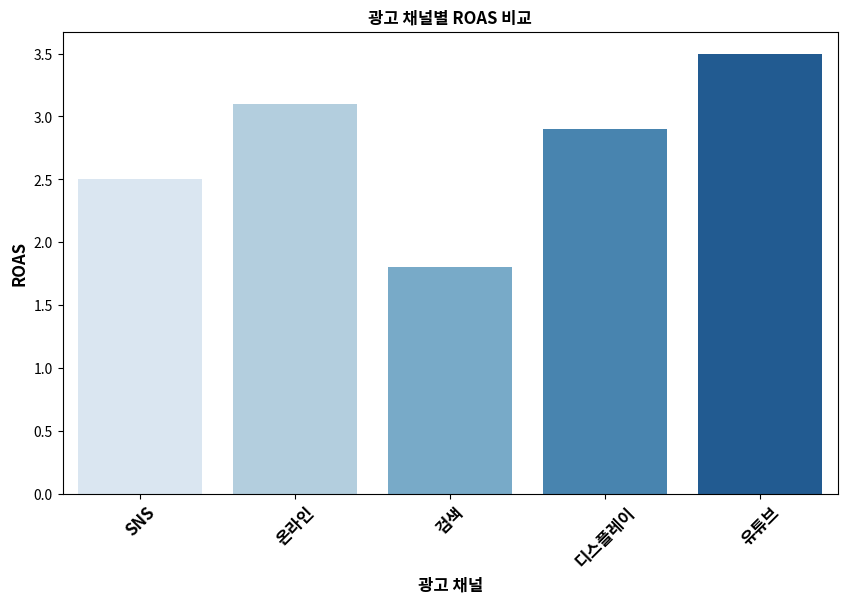

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd

# 한글 폰트 적용 (Noto Sans KR 또는 AppleGothic)
font_path = "/Users/Jooah_kim/Library/Fonts/NotoSansKR-Bold.otf"  # macOS 사용자 지정 폰트 경로
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc("font", family=fontprop.get_name())  # 폰트 설정

# 예제 데이터 (channel_performance 데이터셋)
channel_performance = pd.DataFrame({
    "광고_채널": ["SNS", "온라인", "검색", "디스플레이", "유튜브"],
    "ROAS": [2.5, 3.1, 1.8, 2.9, 3.5]
})

# 시각화: 광고 채널별 ROAS 비교
plt.figure(figsize=(10, 6))
sns.barplot(x="광고_채널", y="ROAS", data=channel_performance, palette="Blues")

plt.title("광고 채널별 ROAS 비교", fontproperties=fontprop)
plt.xlabel("광고 채널", fontproperties=fontprop)
plt.ylabel("ROAS", fontproperties=fontprop)
plt.xticks(rotation=45, fontproperties=fontprop)

plt.show()


# 2. 광고 형식별 성과 분석

In [20]:
format_performance = df.groupby("광고_형식").agg(
    {
        "광고_노출_횟수": "sum",
        "광고_클릭_횟수": "sum",
        "광고_지출액": "sum",
        "매출액": "sum",
        "CTR": "mean",
        "ROAS": "mean",
    }
).reset_index()


/var/folders/d_/2h7g6xq11nbcqvyn6xlxz1s00000gn/T/ipykernel_4722/2669554096.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="광고_형식", y="CTR", data=format_performance, palette="Greens", ax=axes[0])
/var/folders/d_/2h7g6xq11nbcqvyn6xlxz1s00000gn/T/ipykernel_4722/2669554096.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="광고_형식", y="ROAS", data=format_performance, palette="Blues", ax=axes[1])
/var/folders/d_/2h7g6xq11nbcqvyn6xlxz1s00000gn/T/ipykernel_4722/2669554096.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="광고_형식", y=

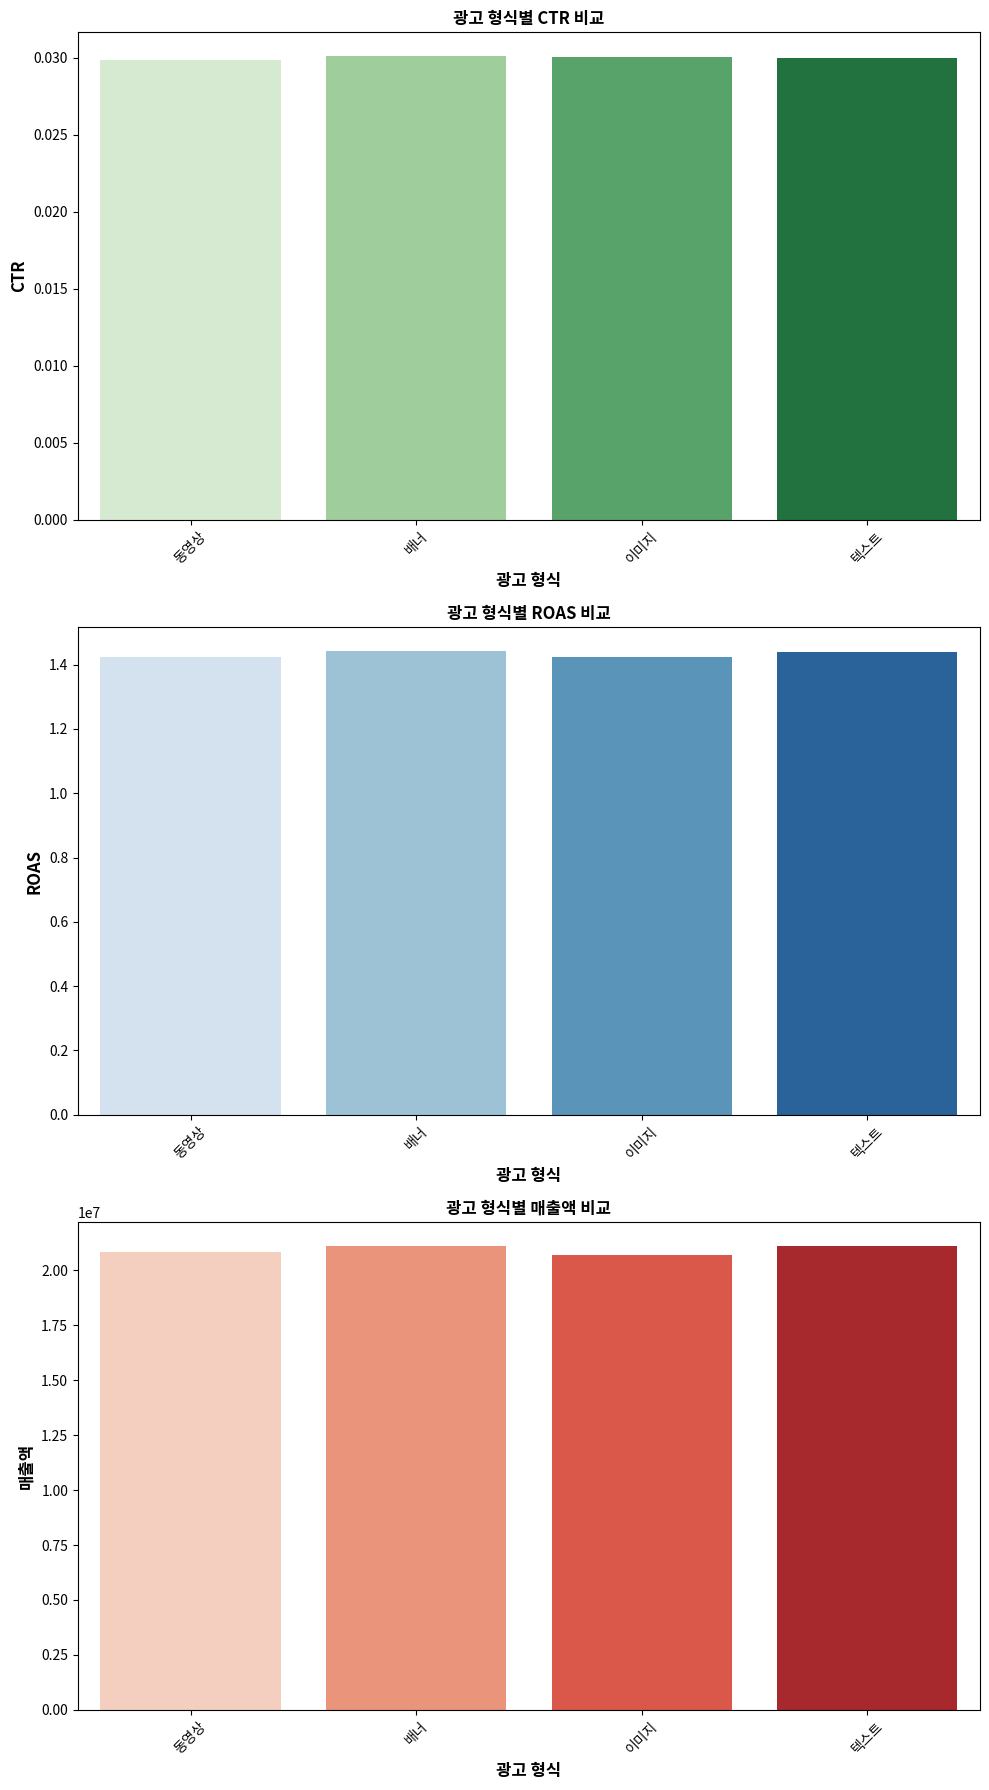

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = "/Users/Jooah_kim/Library/Fonts/NotoSansKR-Bold.otf"
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc("font", family=fontprop.get_name())

# 그래프 크기 설정
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# 1. 광고 형식별 CTR 비교
sns.barplot(x="광고_형식", y="CTR", data=format_performance, palette="Greens", ax=axes[0])
axes[0].set_title("광고 형식별 CTR 비교", fontproperties=fontprop)
axes[0].set_xlabel("광고 형식", fontproperties=fontprop)
axes[0].set_ylabel("CTR", fontproperties=fontprop)
axes[0].tick_params(axis='x', rotation=45)

# 2. 광고 형식별 ROAS 비교
sns.barplot(x="광고_형식", y="ROAS", data=format_performance, palette="Blues", ax=axes[1])
axes[1].set_title("광고 형식별 ROAS 비교", fontproperties=fontprop)
axes[1].set_xlabel("광고 형식", fontproperties=fontprop)
axes[1].set_ylabel("ROAS", fontproperties=fontprop)
axes[1].tick_params(axis='x', rotation=45)

# 3. 광고 형식별 매출액 비교
sns.barplot(x="광고_형식", y="매출액", data=format_performance, palette="Reds", ax=axes[2])
axes[2].set_title("광고 형식별 매출액 비교", fontproperties=fontprop)
axes[2].set_xlabel("광고 형식", fontproperties=fontprop)
axes[2].set_ylabel("매출액", fontproperties=fontprop)
axes[2].tick_params(axis='x', rotation=45)

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()


  광고_형식   광고_노출_횟수  광고_클릭_횟수       광고_지출액          매출액       CTR      ROAS
0   동영상  250845415   7492611  18422982.60  20846062.75  0.029869  1.422711
1    배너  250606184   7551729  18334958.29  21128224.68  0.030137  1.443858
2   이미지  247937899   7453125  18181790.18  20688652.11  0.030061  1.422917
3   텍스트  250623534   7517963  18410389.79  21130713.74  0.029998  1.440635


/var/folders/d_/2h7g6xq11nbcqvyn6xlxz1s00000gn/T/ipykernel_4722/271643389.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="광고_형식", y="CTR", data=format_performance, palette="Blues", ax=ax1)


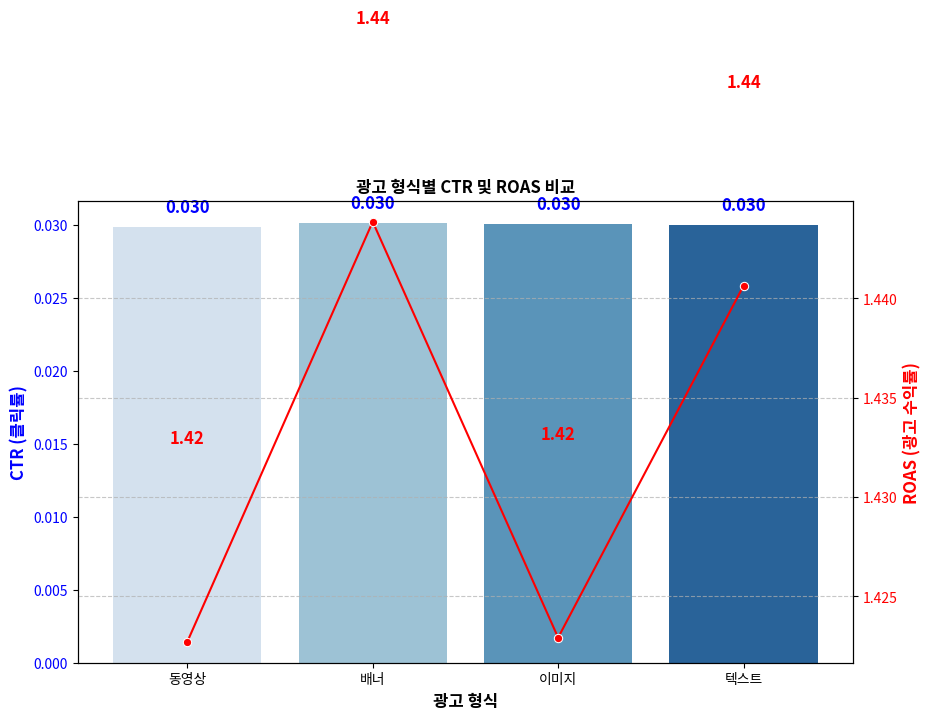

In [23]:
# --- 오류 해결을 위한 데이터 확인 ---
print(format_performance.head())  # 데이터가 정상적으로 있는지 확인

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대 그래프 (CTR)
sns.barplot(x="광고_형식", y="CTR", data=format_performance, palette="Blues", ax=ax1)
ax1.set_ylabel("CTR (클릭률)", fontproperties=fontprop, color="blue")
ax1.set_xlabel("광고 형식", fontproperties=fontprop)
ax1.tick_params(axis='y', labelcolor="blue")

# **CTR 수치 라벨 추가**
for i, v in enumerate(format_performance["CTR"]):
    ax1.text(i, v + 0.001, f"{v:.3f}", ha='center', color='blue', fontproperties=fontprop)

# 보조축 추가 (ROAS)
ax2 = ax1.twinx()
sns.lineplot(x="광고_형식", y="ROAS", data=format_performance, color="red", marker="o", ax=ax2)
ax2.set_ylabel("ROAS (광고 수익률)", fontproperties=fontprop, color="red")
ax2.tick_params(axis='y', labelcolor="red")

# **ROAS 수치 라벨 추가**
for i, v in enumerate(format_performance["ROAS"]):
    ax2.text(i, v + 0.01, f"{v:.2f}", ha='center', color='red', fontproperties=fontprop)

plt.title("광고 형식별 CTR 및 ROAS 비교", fontproperties=fontprop)
plt.xticks(fontproperties=fontprop)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [24]:
# 1. 광고_타겟팅 컬럼을 분류하여 새로운 컬럼 생성
import pandas as pd

# 광고_타겟팅 컬럼을 , 기준으로 분할하여 새로운 컬럼 생성
df[['광고_타겟팅1', '광고_타겟팅2', '광고_타겟팅3']] = df['광고_타겟팅'].str.split(',', expand=True)

# 공백 제거
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 세그먼트 컬럼이 잘 생성되었는지 확인
print(df[['광고_타겟팅', '광고_타겟팅1', '광고_타겟팅2', '광고_타겟팅3']].head())


/var/folders/d_/2h7g6xq11nbcqvyn6xlxz1s00000gn/T/ipykernel_4722/977896176.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


        광고_타겟팅 광고_타겟팅1 광고_타겟팅2 광고_타겟팅3
0  20대, 남성, 패션     20대      남성      패션
1  50대, 여성, 게임     50대      여성      게임
2  40대, 여성, 패션     40대      여성      패션
3  40대, 남성, 건강     40대      남성      건강
4  50대, 남성, 게임     50대      남성      게임


In [26]:
from IPython.display import display

# 관심사별 광고 성과 데이터 확인
display(interest_segment)


,광고_타겟팅3,광고_노출_횟수,광고_클릭_횟수,광고_지출액,매출액,CTR,ROAS
3,요리,162970233,5029314,11775515.07,14150196.59,0.030861,1.490254
4,음악,159495920,4887190,11560501.62,13887995.57,0.030641,1.488040
0,건강,269290659,8272016,19490488.22,23412295.51,0.030719,1.485423
2,여행,106518038,3271735,7710647.47,9223060.84,0.030717,1.480746
1,게임,108906969,3363295,7882424.35,9422026.13,0.030885,1.480227
5,패션,159044810,4854062,11564098.44,13698078.64,0.030521,1.467704


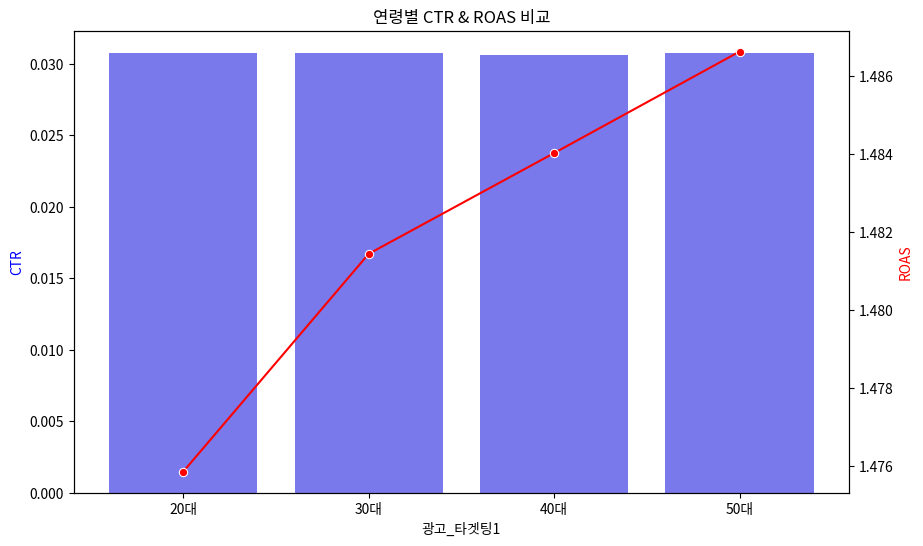

/var/folders/d_/2h7g6xq11nbcqvyn6xlxz1s00000gn/T/ipykernel_4722/1390854111.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="광고_타겟팅2", y="ROAS", data=gender_segment, palette="coolwarm")


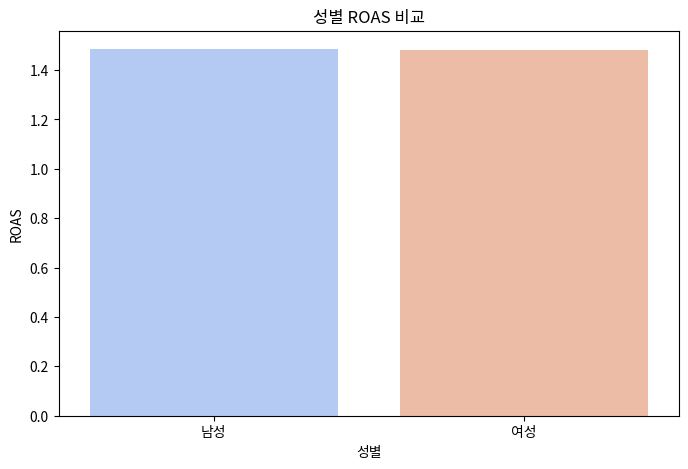

ModuleNotFoundError: No module named 'ace_tools'

In [25]:
# 타겟팅별 광고 성과 분석
import matplotlib.pyplot as plt
import seaborn as sns

# CTR, ROAS 등 광고 성과 지표 계산
df["CTR"] = df["광고_클릭_횟수"] / df["광고_노출_횟수"]  # 클릭률 (Click Through Rate)
df["ROAS"] = df["매출액"] / df["광고_지출액"]  # ROAS (Return on Ad Spend)

# NaN 값 처리 (무한대 값 제거)
df.replace([float("inf"), -float("inf")], None, inplace=True)
df.dropna(inplace=True)

# 광고_타겟팅1(연령)별 광고 성과 분석
age_segment = df.groupby("광고_타겟팅1").agg(
    {
        "광고_노출_횟수": "sum",
        "광고_클릭_횟수": "sum",
        "광고_지출액": "sum",
        "매출액": "sum",
        "CTR": "mean",
        "ROAS": "mean",
    }
).reset_index()

# 시각화: 연령별 광고 성과 비교 (CTR & ROAS)
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x="광고_타겟팅1", y="CTR", data=age_segment, ax=ax1, color="blue", alpha=0.6)
ax1.set_ylabel("CTR", color="blue")

ax2 = ax1.twinx()
sns.lineplot(x="광고_타겟팅1", y="ROAS", data=age_segment, ax=ax2, color="red", marker="o")
ax2.set_ylabel("ROAS", color="red")

plt.title("연령별 CTR & ROAS 비교")
plt.xlabel("연령")
plt.show()

# 광고_타겟팅2(성별)별 광고 성과 분석
gender_segment = df.groupby("광고_타겟팅2").agg(
    {
        "광고_노출_횟수": "sum",
        "광고_클릭_횟수": "sum",
        "광고_지출액": "sum",
        "매출액": "sum",
        "CTR": "mean",
        "ROAS": "mean",
    }
).reset_index()

# 시각화: 성별 광고 성과 비교
plt.figure(figsize=(8, 5))
sns.barplot(x="광고_타겟팅2", y="ROAS", data=gender_segment, palette="coolwarm")
plt.title("성별 ROAS 비교")
plt.xlabel("성별")
plt.ylabel("ROAS")
plt.show()

# 광고_타겟팅3(관심사)별 광고 성과 분석
interest_segment = df.groupby("광고_타겟팅3").agg(
    {
        "광고_노출_횟수": "sum",
        "광고_클릭_횟수": "sum",
        "광고_지출액": "sum",
        "매출액": "sum",
        "CTR": "mean",
        "ROAS": "mean",
    }
).reset_index().sort_values("ROAS", ascending=False)

import ace_tools as tools
tools.display_dataframe_to_user(name="관심사별 광고 성과", dataframe=interest_segment)

광고타겟팅 3관련

  광고_타겟팅3   광고_노출_횟수  광고_클릭_횟수       광고_지출액          매출액       CTR      ROAS
3      요리  162970233   5029314  11775515.07  14150196.59  0.030861  1.490254
4      음악  159495920   4887190  11560501.62  13887995.57  0.030641  1.488040
0      건강  269290659   8272016  19490488.22  23412295.51  0.030719  1.485423
2      여행  106518038   3271735   7710647.47   9223060.84  0.030717  1.480746
1      게임  108906969   3363295   7882424.35   9422026.13  0.030885  1.480227


/var/folders/d_/2h7g6xq11nbcqvyn6xlxz1s00000gn/T/ipykernel_4722/1941543363.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="광고_타겟팅3", y="CTR", data=interest_segment, palette="Blues", ax=ax1)
/var/folders/d_/2h7g6xq11nbcqvyn6xlxz1s00000gn/T/ipykernel_4722/1941543363.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontproperties=fontprop)


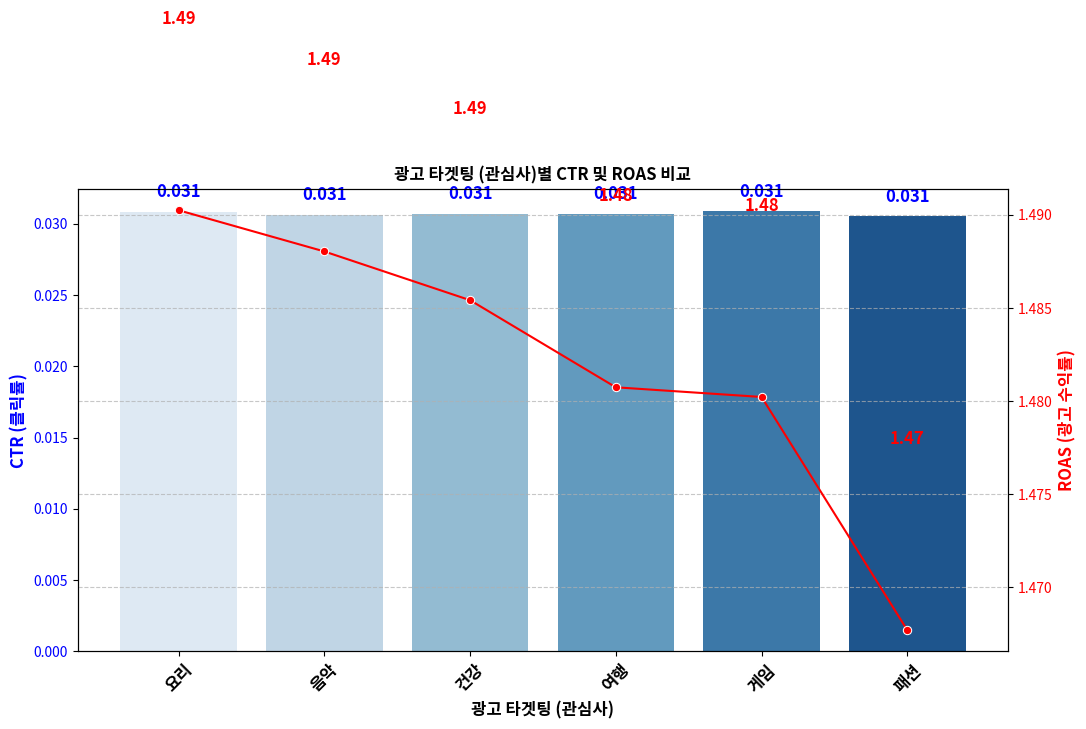

/var/folders/d_/2h7g6xq11nbcqvyn6xlxz1s00000gn/T/ipykernel_4722/1941543363.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="광고_타겟팅3", y="매출액", data=interest_segment, palette="Greens")


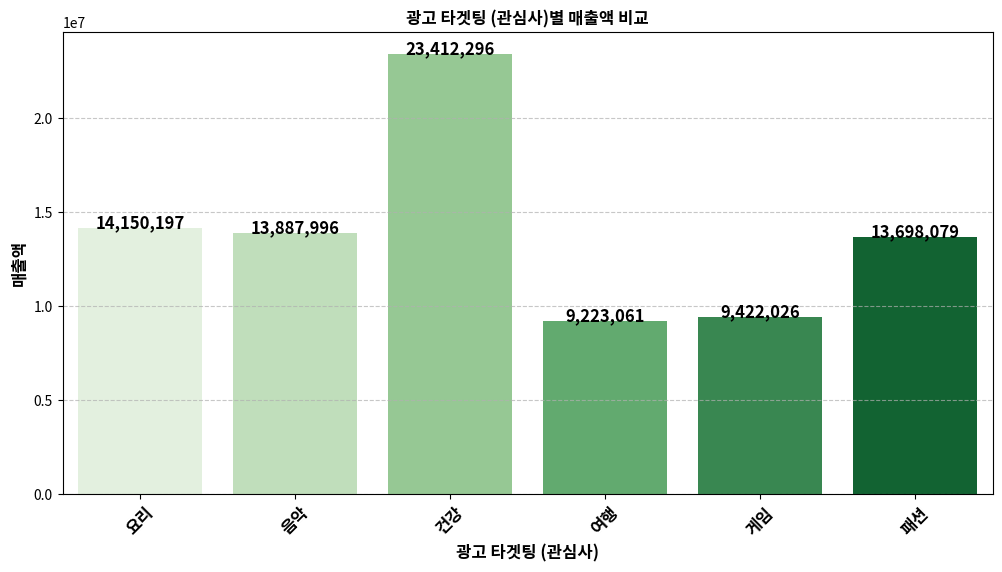

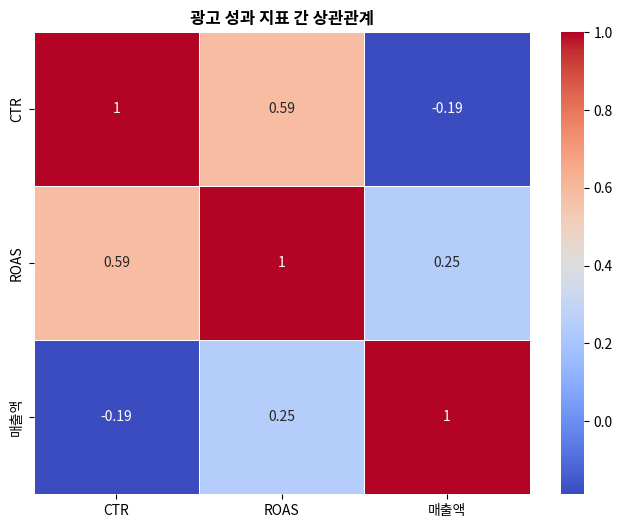

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd

# 한글 폰트 설정
font_path = "/Users/Jooah_kim/Library/Fonts/NotoSansKR-Bold.otf"
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc("font", family=fontprop.get_name())

# 광고_타겟팅3(관심사)별 광고 성과 분석
interest_segment = df.groupby("광고_타겟팅3").agg(
    {
        "광고_노출_횟수": "sum",
        "광고_클릭_횟수": "sum",
        "광고_지출액": "sum",
        "매출액": "sum",
        "CTR": "mean",
        "ROAS": "mean",
    }
).reset_index().sort_values("ROAS", ascending=False)

# 데이터 확인
print(interest_segment.head())

# --- 1. 광고 타겟팅(관심사)별 CTR 및 ROAS 비교 ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# 막대 그래프 (CTR)
sns.barplot(x="광고_타겟팅3", y="CTR", data=interest_segment, palette="Blues", ax=ax1)
ax1.set_ylabel("CTR (클릭률)", fontproperties=fontprop, color="blue")
ax1.set_xlabel("광고 타겟팅 (관심사)", fontproperties=fontprop)
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontproperties=fontprop)

# CTR 수치 라벨 추가
for i, v in enumerate(interest_segment["CTR"]):
    ax1.text(i, v + 0.001, f"{v:.3f}", ha='center', color='blue', fontproperties=fontprop)

# 보조축 (ROAS)
ax2 = ax1.twinx()
sns.lineplot(x="광고_타겟팅3", y="ROAS", data=interest_segment, color="red", marker="o", ax=ax2)
ax2.set_ylabel("ROAS (광고 수익률)", fontproperties=fontprop, color="red")
ax2.tick_params(axis='y', labelcolor="red")

# ROAS 수치 라벨 추가
for i, v in enumerate(interest_segment["ROAS"]):
    ax2.text(i, v + 0.01, f"{v:.2f}", ha='center', color='red', fontproperties=fontprop)

plt.title("광고 타겟팅 (관심사)별 CTR 및 ROAS 비교", fontproperties=fontprop)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 2. 광고 타겟팅(관심사)별 매출액 비교 ---
plt.figure(figsize=(12, 6))
sns.barplot(x="광고_타겟팅3", y="매출액", data=interest_segment, palette="Greens")

plt.title("광고 타겟팅 (관심사)별 매출액 비교", fontproperties=fontprop)
plt.xlabel("광고 타겟팅 (관심사)", fontproperties=fontprop)
plt.ylabel("매출액", fontproperties=fontprop)
plt.xticks(rotation=45, fontproperties=fontprop)

# 매출액 수치 라벨 추가
for i, v in enumerate(interest_segment["매출액"]):
    plt.text(i, v + 1000, f"{v:,.0f}", ha='center', color='black', fontproperties=fontprop)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- 3. 광고 성과 지표 간 상관관계 분석 (Heatmap) ---
plt.figure(figsize=(8, 6))
corr_matrix = interest_segment[["CTR", "ROAS", "매출액"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("광고 성과 지표 간 상관관계", fontproperties=fontprop)
plt.show()


✅ 기대되는 인사이트

1. CTR(클릭률)이 높은 관심사 vs. ROAS(광고 수익률)가 높은 관심사 비교
- CTR이 높지만 ROAS가 낮다면, 전환율이 낮은 관심사일 수 있음 → 개선 필요
- ROAS가 높지만 CTR이 낮다면, 더 많은 유입을 유도해야 함 → 예산 증액 가능성 검토

2. 매출액이 가장 높은 관심사 확인
- 특정 관심사를 타겟팅한 광고가 실제 수익을 많이 창출하는지 확인

3. 상관관계 분석 (Heatmap)
- CTR, ROAS, 매출액 간 관계 파악 → 광고 전략 최적화 가능